# Data analysis : Theme

Données relatives au resultats des tests covid virologique

## Step 0 : Preparations

### Step 0.1 : Import libraries

In [1]:
import pandas as pd
import numpy as np

# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns

### Step 0.2 : Load files, or call API

In [2]:
# 197 mo file
# link to download : https://public.opendatasoft.com/explore/dataset/sirene_v3/download/?format=csv&disjunctive.libellecommuneetablissement=true&disjunctive.etatadministratifetablissement=true&disjunctive.sectionetablissement=true&disjunctive.naturejuridiqueunitelegale=true&refine.departementetablissement=LANDES&timezone=Europe/Paris&lang=fr&use_labels_for_header=true&csv_separator=%3B

df = pd.read_csv("donnees-dep-positivite-tests-virologiques-covid-19-france.csv", error_bad_lines=False, sep=";")

## Step 1 : Exploratory Data Analysis

### Step 1.1 : Check data shape

In [3]:
df.shape

(7645, 12)

In [4]:
df

Date  Nombre de tests positifs  Nombre total de tests  \
0     2021-06-01                        12                    294   
1     2021-06-03                         6                    356   
2     2021-06-03                         3                    314   
3     2021-06-06                         1                     22   
4     2021-06-08                        21                    842   
...          ...                       ...                    ...   
7640  2022-04-04                        82                    247   
7641  2022-04-04                       152                    342   
7642  2022-04-05                       729                   1972   
7643  2022-04-06                        22                     54   
7644  2022-04-07                       122                    242   

     Classe d’âge  Code Département  Taux de positivité Code ISO 3166 Zone  \
0              49                40            4.081633                FXX   
1              09                40            1.685393                FXX   
2              39                40            0.955414                FXX   
3              49                40            4.545455                FXX   
4              19                40            2.494062                FXX   
...           ...               ...                 ...                ...   
7640           29                40           33.198381                FXX   
7641           39                40           44.444444                FXX   
7642        Total                40           36.967546                FXX   
7643           90                40           40.740741                FXX   
7644           59                40           50.413223                FXX   

                      geo_point_2d     pop Nom Département  \
0     43.9678995107,-0.78938928305   54129          Landes   
1     43.9678995107,-0.78938928305   40045          Landes   
2     43.9678995107,-0.78938928305   45849          Landes   
3     43.9678995107,-0.78938928305   54129          Landes   
4     43.9678995107,-0.78938928305   45099          Landes   
...                            ...     ...             ...   
7640  43.9678995107,-0.78938928305   32646          Landes   
7641  43.9678995107,-0.78938928305   45849          Landes   
7642  43.9678995107,-0.78938928305  411979          Landes   
7643  43.9678995107,-0.78938928305    6863          Landes   
7644  43.9678995107,-0.78938928305   58062          Landes   

              Nom Région  Code INSEE Région  
0     Nouvelle-Aquitaine                 75  
1     Nouvelle-Aquitaine                 75  
2     Nouvelle-Aquitaine                 75  
3     Nouvelle-Aquitaine                 75  
4     Nouvelle-Aquitaine                 75  
...                  ...                ...  
7640  Nouvelle-Aquitaine                 75  
7641  Nouvelle-Aquitaine                 75  
7642  Nouvelle-Aquitaine                 75  
7643  Nouvelle-Aquitaine                 75  
7644  Nouvelle-Aquitaine                 75  

[7645 rows x 12 columns]

### Step 1.2 : Check each data type of columns and missing values

In [5]:
df.columns

Index(['Date', 'Nombre de tests positifs', 'Nombre total de tests',
       'Classe d’âge', 'Code Département', 'Taux de positivité',
       'Code ISO 3166 Zone', 'geo_point_2d', 'pop', 'Nom Département',
       'Nom Région', 'Code INSEE Région'],
      dtype='object')

In [6]:
df = df[df["Code Département"]==40] # On garde que les données du département des landes
df

Date  Nombre de tests positifs  Nombre total de tests  \
0     2021-06-01                        12                    294   
1     2021-06-03                         6                    356   
2     2021-06-03                         3                    314   
3     2021-06-06                         1                     22   
4     2021-06-08                        21                    842   
...          ...                       ...                    ...   
7640  2022-04-04                        82                    247   
7641  2022-04-04                       152                    342   
7642  2022-04-05                       729                   1972   
7643  2022-04-06                        22                     54   
7644  2022-04-07                       122                    242   

     Classe d’âge  Code Département  Taux de positivité Code ISO 3166 Zone  \
0              49                40            4.081633                FXX   
1              09                40            1.685393                FXX   
2              39                40            0.955414                FXX   
3              49                40            4.545455                FXX   
4              19                40            2.494062                FXX   
...           ...               ...                 ...                ...   
7640           29                40           33.198381                FXX   
7641           39                40           44.444444                FXX   
7642        Total                40           36.967546                FXX   
7643           90                40           40.740741                FXX   
7644           59                40           50.413223                FXX   

                      geo_point_2d     pop Nom Département  \
0     43.9678995107,-0.78938928305   54129          Landes   
1     43.9678995107,-0.78938928305   40045          Landes   
2     43.9678995107,-0.78938928305   45849          Landes   
3     43.9678995107,-0.78938928305   54129          Landes   
4     43.9678995107,-0.78938928305   45099          Landes   
...                            ...     ...             ...   
7640  43.9678995107,-0.78938928305   32646          Landes   
7641  43.9678995107,-0.78938928305   45849          Landes   
7642  43.9678995107,-0.78938928305  411979          Landes   
7643  43.9678995107,-0.78938928305    6863          Landes   
7644  43.9678995107,-0.78938928305   58062          Landes   

              Nom Région  Code INSEE Région  
0     Nouvelle-Aquitaine                 75  
1     Nouvelle-Aquitaine                 75  
2     Nouvelle-Aquitaine                 75  
3     Nouvelle-Aquitaine                 75  
4     Nouvelle-Aquitaine                 75  
...                  ...                ...  
7640  Nouvelle-Aquitaine                 75  
7641  Nouvelle-Aquitaine                 75  
7642  Nouvelle-Aquitaine                 75  
7643  Nouvelle-Aquitaine                 75  
7644  Nouvelle-Aquitaine                 75  

[7645 rows x 12 columns]

In [7]:
df = df.drop(['Code Département', 'Nom Département', 'Nom Région', 'Code INSEE Région'], axis=1)

In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7644
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      7645 non-null   object 
 1   Nombre de tests positifs  7645 non-null   int64  
 2   Nombre total de tests     7645 non-null   int64  
 3   Classe d’âge              7645 non-null   object 
 4   Taux de positivité        7605 non-null   float64
 5   Code ISO 3166 Zone        7645 non-null   object 
 6   geo_point_2d              7645 non-null   object 
 7   pop                       7645 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 537.5+ KB


<ipython-input-8-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


### Step 1.3 : Check the percentages of missing value and remove columns with only null values

In [9]:
print(df.isnull().sum() / df.shape[0])
print(df.shape)

# Drop columns with only null
df.dropna(axis=1, how='all', inplace=True)

print(df.isnull().sum() / df.shape[0])
print(df.shape)

Date                        0.000000
Nombre de tests positifs    0.000000
Nombre total de tests       0.000000
Classe d’âge                0.000000
Taux de positivité          0.005232
Code ISO 3166 Zone          0.000000
geo_point_2d                0.000000
pop                         0.000000
dtype: float64
(7645, 8)
Date                        0.000000
Nombre de tests positifs    0.000000
Nombre total de tests       0.000000
Classe d’âge                0.000000
Taux de positivité          0.005232
Code ISO 3166 Zone          0.000000
geo_point_2d                0.000000
pop                         0.000000
dtype: float64
(7645, 8)


In [10]:
import operator

cols = {} #Dictionnaire qui contiendra pour chaque colonne le pourcentage des valeurs manquantes

for i in df.columns: #Remplir le dictionnaire d'abord
    cols[i] = df[i].isna().sum()/df.shape[0]

cols = sorted(cols.items(), key=operator.itemgetter(1)) #Puis le trier suivant le pourcentage de valeurs manquantes

for i in cols : #Et enfin afficher les colonnes, leurs types et le pourcentage de valeurs manquantes
    print('La colonne : ' + str(i[0]) + ', Le type : ' + str(df[i[0]].dtype) + 
          ', Le pourcentage des valeurs manquantes : '+ str(i[1]))

La colonne : Date, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Nombre de tests positifs, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Nombre total de tests, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Classe d’âge, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Code ISO 3166 Zone, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : geo_point_2d, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : pop, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Taux de positivité, Le type : float64, Le pourcentage des valeurs manquantes : 0.005232177894048398


### Step 1.4 : Summary Statistics

In [11]:
df.describe()

Nombre de tests positifs  Nombre total de tests  Taux de positivité  \
count               7645.000000            7645.000000         7605.000000   
mean                  41.034009             344.484630            7.669533   
std                  175.021525             757.348895           11.339128   
min                    0.000000               0.000000            0.000000   
25%                    0.000000              35.000000            0.135501   
50%                    5.000000             138.000000            3.427923   
75%                   18.000000             293.000000            8.119658   
max                 4089.000000           11219.000000          100.000000   

                 pop  
count    7645.000000  
mean    74905.272727  
std    107594.087999  
min      6863.000000  
25%     32646.000000  
50%     45099.000000  
75%     58062.000000  
max    411979.000000

### Step 1.5 : Check value counts for a specific column

In [12]:
# In this exemple, we notice in the next step that a SIREN can be used for multiple structure, but the siret seems to change, so we can test that theory
df["Classe d’âge"].value_counts()

90       695
39       695
79       695
19       695
59       695
29       695
09       695
69       695
Total    695
89       695
49       695
Name: Classe d’âge, dtype: int64

### Step 1.6 : Check duplicate values

In [13]:
# Example of the data that have multiple values, for text you can use a graph to see count by word and see if some values correspond to the same thing
df[df["Classe d’âge"] == "39"]

Date  Nombre de tests positifs  Nombre total de tests  \
2     2021-06-03                         3                    314   
27    2021-08-29                         0                     68   
39    2021-09-16                         3                    506   
45    2021-09-27                         4                    420   
53    2021-10-20                         7                    236   
...          ...                       ...                    ...   
7590  2021-11-07                         2                     25   
7607  2021-12-21                        78                    746   
7617  2022-02-01                       449                    962   
7632  2022-03-09                        85                    210   
7641  2022-04-04                       152                    342   

     Classe d’âge  Taux de positivité Code ISO 3166 Zone  \
2              39            0.955414                FXX   
27             39            0.000000                FXX   
39             39            0.592885                FXX   
45             39            0.952381                FXX   
53             39            2.966102                FXX   
...           ...                 ...                ...   
7590           39            8.000000                FXX   
7607           39           10.455764                FXX   
7617           39           46.673597                FXX   
7632           39           40.476190                FXX   
7641           39           44.444444                FXX   

                      geo_point_2d    pop  
2     43.9678995107,-0.78938928305  45849  
27    43.9678995107,-0.78938928305  45849  
39    43.9678995107,-0.78938928305  45849  
45    43.9678995107,-0.78938928305  45849  
53    43.9678995107,-0.78938928305  45849  
...                            ...    ...  
7590  43.9678995107,-0.78938928305  45849  
7607  43.9678995107,-0.78938928305  45849  
7617  43.9678995107,-0.78938928305  45849  
7632  43.9678995107,-0.78938928305  45849  
7641  43.9678995107,-0.78938928305  45849  

[695 rows x 8 columns]

### Step 1.7 : See the data distribution and data anomaly

In [14]:
# Look at numerical columns to choose which column to look at more closely
numerical_columns = list(df.select_dtypes('number'))

print(numerical_columns)

['Nombre de tests positifs', 'Nombre total de tests', 'Taux de positivité', 'pop']


Nombre de tests positifs


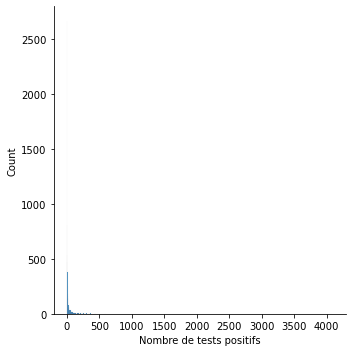

Nombre total de tests


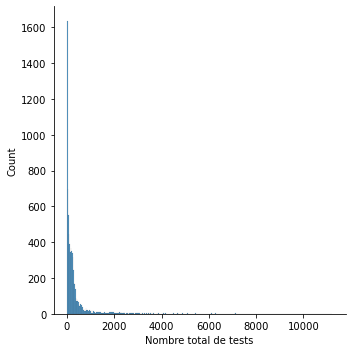

Taux de positivité


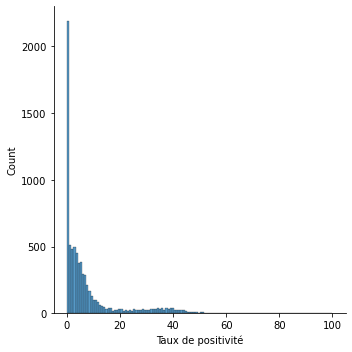

pop


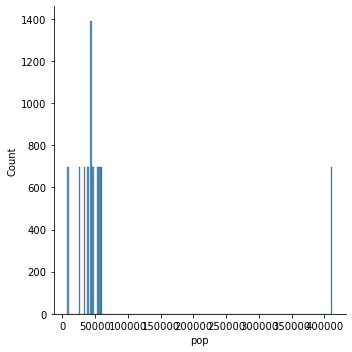

In [15]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    sns.displot(df, x=column)
    print(column)
    plt.show()

### Step 1.8 : Check the correlation between variables in the data

<AxesSubplot:>

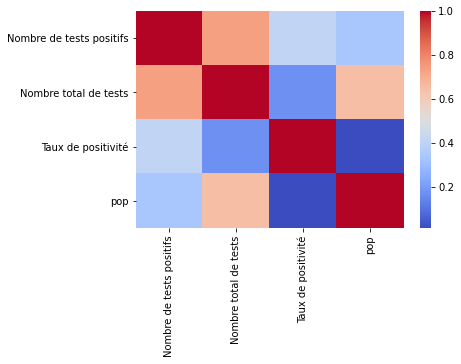

In [16]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, cmap= 'coolwarm')

In [17]:
# If there are too many columns, you can try the methods below
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()
print(corr_pairs)

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

Nombre de tests positifs  Nombre de tests positifs    1.000000
                          Nombre total de tests       0.733972
                          Taux de positivité          0.411906
                          pop                         0.335930
Nombre total de tests     Nombre de tests positifs    0.733972
                          Nombre total de tests       1.000000
                          Taux de positivité          0.170732
                          pop                         0.651397
Taux de positivité        Nombre de tests positifs    0.411906
                          Nombre total de tests       0.170732
                          Taux de positivité          1.000000
                          pop                         0.010450
pop                       Nombre de tests positifs    0.335930
                          Nombre total de tests       0.651397
                          Taux de positivité          0.010450
                          pop                         1

## Step 2 : Data cleaning

### Step 2.1 : Remove irrelevant observations

### Step 2.2 : Remove unwanted outliers

In [18]:
df.columns

Index(['Date', 'Nombre de tests positifs', 'Nombre total de tests',
       'Classe d’âge', 'Taux de positivité', 'Code ISO 3166 Zone',
       'geo_point_2d', 'pop'],
      dtype='object')

<AxesSubplot:>

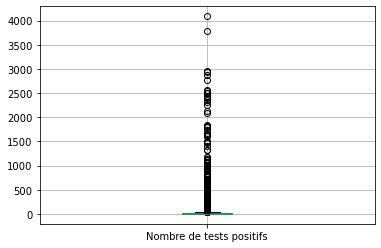

In [19]:
df.boxplot(column=["Nombre de tests positifs"])

In [20]:
df["Nombre de tests positifs"].describe()

count    7645.000000
mean       41.034009
std       175.021525
min         0.000000
25%         0.000000
50%         5.000000
75%        18.000000
max      4089.000000
Name: Nombre de tests positifs, dtype: float64

In [21]:
df[df["Nombre de tests positifs"]>3000]

Date  Nombre de tests positifs  Nombre total de tests  \
99    2022-01-31                      3788                   8563   
3759  2022-01-24                      4089                   9745   

     Classe d’âge  Taux de positivité Code ISO 3166 Zone  \
99          Total           44.236833                FXX   
3759        Total           41.959979                FXX   

                      geo_point_2d     pop  
99    43.9678995107,-0.78938928305  411979  
3759  43.9678995107,-0.78938928305  411979

### Step 2.3 : Handle missing data (drop observations, input missing values based on other observations)

### Step 2.4 : Remove remaining columns with a high percentage of missing values

In [22]:
print(df.shape)
# To remove columns with more than 90% of null : thresh=int( df.shape[0] * 0.90)
# df.dropna(axis=1, thresh=int( df.shape[0] * 0.95) , inplace=True)

print(df.shape)

(7645, 8)
(7645, 8)


In [23]:
print(df.isnull().sum().sort_values() / df.shape[0] * 100)

Date                        0.000000
Nombre de tests positifs    0.000000
Nombre total de tests       0.000000
Classe d’âge                0.000000
Code ISO 3166 Zone          0.000000
geo_point_2d                0.000000
pop                         0.000000
Taux de positivité          0.523218
dtype: float64


### Step 2.5 : Fix structural errors *(strange naming conventions, typos, incorrect capitalization, mislabeled categories. Ex: “N/A” and “Not Applicable”  should be analyzed as the same category.)*

### Step 2.6 : Deal with duplicate values

In [24]:
df.columns

Index(['Date', 'Nombre de tests positifs', 'Nombre total de tests',
       'Classe d’âge', 'Taux de positivité', 'Code ISO 3166 Zone',
       'geo_point_2d', 'pop'],
      dtype='object')

In [25]:
key = ['Date', 'Classe d’âge', 'geo_point_2d'] #Définition de la clé

In [26]:
df_duplicated = df[key].value_counts() # Enregistrer les occurences des tuples de la clé dans df_duplicated
print("Duplicate values :")
df_duplicated[df_duplicated>1] # Puis afficher les instances qui sont dupliquées

Duplicate values :


Series([], dtype: int64)

On constate qu'on a pas de redondance de données

### Step 2.7 : Split values into many columns

### Step 2.8 : Change the data type of columns 

- On change le type de la colonne "Numéro de voie" de Float64 à Int64

In [27]:
for c in df.columns:
    print(c, "-", df[c].dtype)

Date - object
Nombre de tests positifs - int64
Nombre total de tests - int64
Classe d’âge - object
Taux de positivité - float64
Code ISO 3166 Zone - object
geo_point_2d - object
pop - int64


On change le type de la colonne 'Classe d’âge' en entier, 'Date', 'Code ISO 3166 Zone' et 'geo_point_2d' en String

In [28]:
df["Classe d’âge"].unique()

array(['49', '09', '39', '19', '29', '59', '90', '79', '69', 'Total',
       '89'], dtype=object)

In [29]:
df.loc[df[df['Classe d’âge']=="Total"].index, 'Classe d’âge'] = 0

In [30]:
df['Classe d’âge'] = df['Classe d’âge'].astype(int)
df['Classe d’âge'].unique()

array([49,  9, 39, 19, 29, 59, 90, 79, 69,  0, 89])

In [31]:
df["Date"].unique()

array(['2021-06-01', '2021-06-03', '2021-06-06', '2021-06-08',
       '2021-06-09', '2021-06-14', '2021-06-19', '2021-06-26',
       '2021-06-30', '2021-07-04', '2021-07-08', '2021-07-17',
       '2021-07-18', '2021-07-19', '2021-07-21', '2021-07-22',
       '2021-07-24', '2021-07-25', '2021-08-14', '2021-08-16',
       '2021-08-18', '2021-08-21', '2021-08-22', '2021-08-27',
       '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-05',
       '2021-09-07', '2021-09-08', '2021-09-10', '2021-09-13',
       '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-25',
       '2021-09-27', '2021-10-01', '2021-10-03', '2021-10-08',
       '2021-10-09', '2021-10-13', '2021-10-14', '2021-10-15',
       '2021-10-20', '2021-10-24', '2021-10-28', '2021-11-05',
       '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-13',
       '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
       '2021-11-25', '2021-11-26', '2021-11-27', '2021-12-01',
       '2021-12-03', '2021-12-10', '2021-12-11', '2021-

In [32]:
df[['Date', 'Code ISO 3166 Zone', 'geo_point_2d']] = df[['Date', 'Code ISO 3166 Zone', 'geo_point_2d']].astype(str)
df[['Date', 'Code ISO 3166 Zone', 'geo_point_2d']]

Date Code ISO 3166 Zone                  geo_point_2d
0     2021-06-01                FXX  43.9678995107,-0.78938928305
1     2021-06-03                FXX  43.9678995107,-0.78938928305
2     2021-06-03                FXX  43.9678995107,-0.78938928305
3     2021-06-06                FXX  43.9678995107,-0.78938928305
4     2021-06-08                FXX  43.9678995107,-0.78938928305
...          ...                ...                           ...
7640  2022-04-04                FXX  43.9678995107,-0.78938928305
7641  2022-04-04                FXX  43.9678995107,-0.78938928305
7642  2022-04-05                FXX  43.9678995107,-0.78938928305
7643  2022-04-06                FXX  43.9678995107,-0.78938928305
7644  2022-04-07                FXX  43.9678995107,-0.78938928305

[7645 rows x 3 columns]

## Step 3 : Export dataframe to csv

In [33]:
from pathlib import Path

filepath = Path('donnees-dep-positivite-tests-virologiques-covid-19-france_clean.csv')
df.to_csv(filepath, index=False)